In [38]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
fake = f"/content/drive/MyDrive/archive/ML3/Fake.csv"
true = f"/content/drive/MyDrive/archive/ML3/True.csv"

In [41]:
df = pd.read_csv(fake)
df['label'] = 0
df1 = pd.read_csv(true)
df1['label'] = 1
df_train = pd.concat([df, df1])
df_train.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [43]:
#removing null values
df_train.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [44]:
df_train=df_train.fillna(" ")

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [46]:
#removing the punctuations
#Creating a copy 
clean_news=df_train.copy()
def review_cleaning(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.'''
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text
clean_news['title'] = clean_news['title'].apply(lambda x:review_cleaning(x))
clean_news.head()

,title,text,subject,date,label
0,donald trump sends out embarrassing new year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes an internet joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,trump is so obsessed he even has obama’s name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,pope francis just called out donald trump dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [47]:

nltk.download('stopwords')

stop = stopwords.words('english')
clean_news['title'] = clean_news['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,subject,date,label
0,donald trump sends embarrassing new year’s eve...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,drunk bragging trump staffer started russian c...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,sheriff david clarke becomes internet joke thr...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,trump obsessed even obama’s name coded website...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,pope francis called donald trump christmas speech,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [48]:
x = np.array([0,1])
false = (clean_news["label"] == 1).sum()
true = (clean_news["label"] == 0).sum()


In [49]:
true, false

(23481, 21417)

In [50]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['title'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['title' , 'count'])

#Group by words and plot the sum
df1.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')

trump 13632
us 5095
says 3542
video 3284
obama 3123
hillary 2313
house 1989
watch 1952
new 1776
clinton 1726
white 1671
president 1580
bill 1264
russia 1135
state 1080
republican 1060
north 1031
news 999
court 979
media 920


In [51]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(clean_news['title'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['title' , 'count'])

#Group by words and plot the sum
df3.groupby('title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')

white house 1129
donald trump 853
north korea 729
president trump 511
hillary clinton 450
trump says 408
supreme court 399
fox news 343
bernie sanders 267
islamic state 238
ted cruz 234
fake news 223
new york 212
trump supporter 208
boiler room 205
trump supporters 201
puerto rico 196
says trump 191
travel ban 189
lives matter 176


In [52]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['title']].reset_index(drop=True)
news_features.head()

,title
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas speech


In [53]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['title'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)

In [54]:
corpus[1]

'drunk brag trump staffer start russian collus investig'

In [55]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['title'])
X.shape

(44898, 5000)

In [56]:
#Getting the target variable
y=clean_news['label']

In [57]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23481, 1: 21417})


In [58]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
"""#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))"""

'#creating the objects\nlogreg_cv = LogisticRegression(random_state=0)\ndt_cv=DecisionTreeClassifier()\nknn_cv=KNeighborsClassifier()\nnb_cv=MultinomialNB(alpha=0.1) \ncv_dict = {0: \'Logistic Regression\', 1: \'Decision Tree\',2:\'KNN\',3:\'Naive Bayes\'}\ncv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]\n\n#Printing the accuracy\nfor i,model in enumerate(cv_models):\n    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring =\'accuracy\').mean()))'

In [60]:
"""#Logistic Regression with Hyperparameter Tuning
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))"""

'#Logistic Regression with Hyperparameter Tuning\nparam_grid = {\'C\': np.logspace(-4, 4, 50),\n             \'penalty\':[\'l1\', \'l2\']}\nclf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)\nbest_model = clf.fit(X_train,y_train)\nprint(best_model.best_estimator_)\nprint("The mean accuracy of the model is:",best_model.score(X_test,y_test))'

In [61]:
"""logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))"""

"logreg = LogisticRegression(C=24.420530945486497, random_state=0)\nlogreg.fit(X_train, y_train)\ny_pred = logreg.predict(X_test)\nprint('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))"

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

In [63]:
"""#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()"""

'#Creating confusion matrix\n#confusion_matrix(y_test,y_pred)\nconfusion_matrix = metrics.confusion_matrix(y_test,y_pred)\ncm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])\n\ncm_display.plot()\nplt.show()'

In [64]:
"""print("Classification Report:\n",classification_report(y_test, y_pred))"""

'print("Classification Report:\n",classification_report(y_test, y_pred))'

In [65]:
"""#ROC-AUC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()"""

'#ROC-AUC Curve\nlogit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))\nfpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])\nplt.figure()\nplt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % logit_roc_auc)\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([-0.01, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.legend(loc="lower right")\nplt.show()'

In [66]:
#Deep learning-LSTM
corpus[1]

'drunk brag trump staffer start russian collus investig'

In [67]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [68]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2098  673 8598]
 [   0    0    0 ... 8043 7084 2958]
 [   0    0    0 ...  953 8466 6913]
 ...
 [   0    0    0 ... 8913  326 5179]
 [   0    0    0 ...  972 3202  574]
 [   0    0    0 ... 6870 8043 6883]]


In [69]:
embedded_docs[1]

array([   0,    0,    0, ..., 8043, 7084, 2958], dtype=int32)

In [70]:
#LSTM Model
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(160)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5000, 40)          400000    
                                                                 
 dropout_2 (Dropout)         (None, 5000, 40)          0         
                                                                 
 lstm_1 (LSTM)               (None, 160)               128640    
                                                                 
 dropout_3 (Dropout)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 528,801
Trainable params: 528,801
Non-trainable params: 0
_________________________________________________________________
None


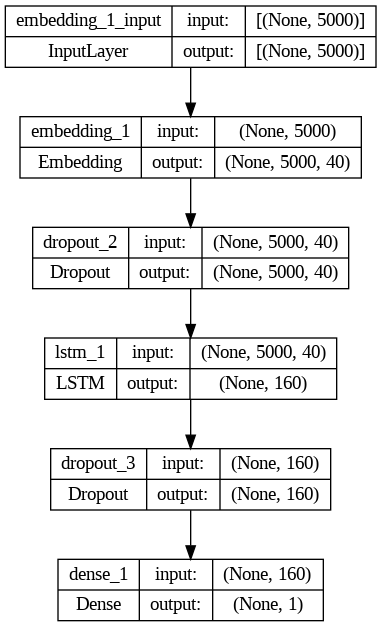

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [72]:
len(embedded_docs),y.shape

(44898, (44898,))

In [73]:
#Fitting the LSTM Model
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((44898, 5000), (44898,))

In [74]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.4, random_state=35)

# Fitting with 10 epochs and 64 batch size
history = model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=64)

Epoch 1/10
337/337 [==============================] - 97s 277ms/step - loss: 0.6780 - accuracy: 0.6581 - val_loss: 0.5275 - val_accuracy: 0.8103
Epoch 2/10
337/337 [==============================] - 86s 255ms/step - loss: 0.3726 - accuracy: 0.8616 - val_loss: 0.3028 - val_accuracy: 0.8719
Epoch 3/10
337/337 [==============================] - 86s 254ms/step - loss: 0.2226 - accuracy: 0.9128 - val_loss: 0.2347 - val_accuracy: 0.9000
Epoch 4/10
337/337 [==============================] - 85s 251ms/step - loss: 0.1561 - accuracy: 0.9418 - val_loss: 0.2012 - val_accuracy: 0.9135
Epoch 5/10
337/337 [==============================] - 85s 251ms/step - loss: 0.1168 - accuracy: 0.9571 - val_loss: 0.1842 - val_accuracy: 0.9237
Epoch 6/10
337/337 [==============================] - 83s 247ms/step - loss: 0.0908 - accuracy: 0.9677 - val_loss: 0.1800 - val_accuracy: 0.9285
Epoch 7/10
337/337 [==============================] - 83s 248ms/step - loss: 0.0714 - accuracy: 0.9765 - val_loss: 0.1826 - val_ac

In [75]:
import pickle
filename = 'LSTM.sav'
pickle.dump(model, open('/content/drive/MyDrive/models/LSTM.sav','wb'))

In [76]:
"""import pickle
model = pickle.load(open('/content/drive/MyDrive/models/LSTM.sav','rb'))"""

"import pickle\nmodel = pickle.load(open('/content/drive/MyDrive/models/LSTM.sav','rb'))"

562/562 [==============================] - 34s 61ms/step


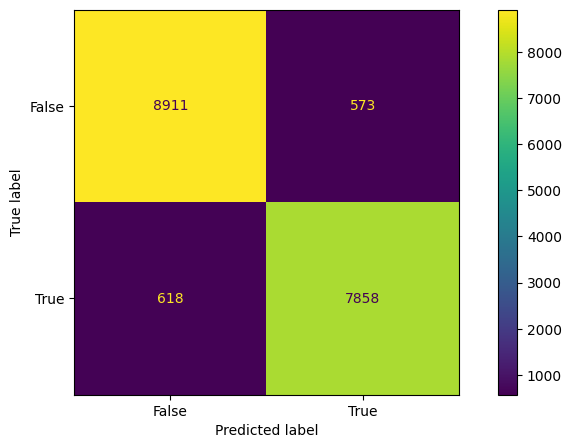

In [77]:
# Predicting from test data
y_pred=(model.predict(X_test) > 0.5).astype("int32")

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#Checking for accuracy
accuracy_score(y_test,y_pred)

In [ ]:
# Creating classification report 
print(classification_report(y_test,y_pred))

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.savefig('/content/drive/MyDrive/model graphs/LSTM_tvl.jpg', dpi=150)
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.savefig('/content/drive/MyDrive/model graphs/LSTM_tva.jpg', dpi=150)
plt.show()

In [84]:
%%time
model.predict(X_test[:1])

1/1 [==============================] - 0s 83ms/step
CPU times: user 109 ms, sys: 18.5 ms, total: 128 ms
Wall time: 194 ms


array([[0.00254814]], dtype=float32)

In [82]:
%%time
logreg.predict(X_test[:1])

NameError: ignored

In [83]:
"END"

'END'